In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [137]:
# loading dataframes for eda
train_transaction = pd.read_csv('/Users/krahman/work/fraud_detection/data/train_transaction.csv')
train_identity = pd.read_csv('/Users/krahman/work/fraud_detection/data/train_identity.csv')
df_eda = train_transaction.merge(train_identity, on='TransactionID', how='left') # merging df

df_features = pd.read_csv('/Users/krahman/work/fraud_detection/saved_files/df_imputed.csv')
df_features = df_features.drop('Unnamed: 0', axis=1)

In [5]:
train_transaction.head() # KEEP

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_identity.head() # KEEP

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [7]:
train_transaction.info(); # KEEP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [8]:
train_identity.info(); # KEEP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

### Data Quality Check

In [9]:
target = 'isFraud'
col_id = 'TransactionID'
df_feat = df_eda.drop([col_id, target], axis=1)

In [10]:
# How many transactions are in the dataset?
len_df = df_eda.shape[0]
print("Total number of records:", len_df)

# How many duplicate records are in the dataset. 
val_duplicate_records = np.sum(df_eda[col_id].duplicated())
print('Total number of duplicate records:', val_duplicate_records)

# How many features are in the dataset?
total_features = df_feat.shape[1]
print('Total number of features:', total_features)

# What is the fraud rate of the data set?
fraud_rate = df_eda[target].value_counts() / df_eda.shape[0]
val_perc_fraud = round(fraud_rate[1]*100, 3)
val_perc_not_fraud = round(fraud_rate[0]*100, 3)
print("Percentage of Fraudulent Transactions:", val_perc_fraud, "%")
print("Percentage of Non-Fraudulent Transactions:", val_perc_not_fraud, "%")

# How many columns have null values?
df_null = df_feat.isnull().any().value_counts()
val_total_null = df_null[1]
print("Total number of columns with null values:", val_total_null)

# How many columns have more than 50% missing data?
df_null_total = np.sum(df_feat.isnull())
total_null_50_perc = df_null_total[df_null_total > (len_df*.5)].shape[0]
print("Total number of columns with more than 50% missing data:", total_null_50_perc)

Total number of records: 590540
Total number of duplicate records: 0
Total number of features: 432
Percentage of Fraudulent Transactions: 3.499 %
Percentage of Non-Fraudulent Transactions: 96.501 %
Total number of columns with null values: 414
Total number of columns with more than 50% missing data: 214


In [11]:
print("Dataframe info:")
print(df_eda.info()) # KEEP

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB
None


In [184]:
print("Column data types:")
print(df_eda.dtypes) # KEEP

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
id_36              object
id_37              object
id_38              object
DeviceType         object
DeviceInfo         object
Length: 434, dtype: object


In [185]:
# What is the statistical overview of the data set?
df_eda.describe() # KEEP

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [163]:
# fraud_summary = df_eda.groupby('isFraud')
# fraud_summary.mean() # KEEP

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
isFraud,,,,,,,,,,,,,,,,,,,,,
0,3.281810e+06,7.360791e+06,134.511665,9911.464381,362.453981,152.862034,199.542212,290.643341,86.813620,117.360098,...,188.113697,14.213882,354.854950,401.133705,364.479400,15.757959,12.802301,328.622269,148.112917,26.452391
1,3.294952e+06,7.690033e+06,149.244779,9547.654164,365.370850,162.368648,191.994328,294.317134,86.286024,174.588854,...,204.991400,14.497189,333.060156,435.838002,410.382629,18.727700,12.786070,340.764988,159.743529,27.716024


In [47]:
fraud_summary.mean().to_csv('/Users/krahman/work/fraud_detection/saved_files/fraud_groupby.csv')

In [165]:
# NEXT, whats next for EDA? Continue below, Also, test our result for XGBClassifier... 

### Data Quality Check

In [166]:
list_null = df_train.isnull().any() #KEEP
df_null = pd.DataFrame(list_null).reset_index()
df_null

,index,0
0,TransactionID,False
1,isFraud,False
2,TransactionDT,False
3,TransactionAmt,False
4,ProductCD,False
...,...,...
429,id_36,True
430,id_37,True
431,id_38,True
432,DeviceType,True


In [188]:
# KEEP
train_transaction_sum = train_transaction.duplicated().sum()
train_identity_sum = train_identity.duplicated().sum()
columns = train_transaction.columns
print('Train transaction duplicates: {}\nTrain identity duplicates: {} \n'.format(train_transaction_sum, train_identity_sum))
# print('Train feature columns:\n', list(columns))

Train transaction duplicates: 0
Train identity duplicates: 0 



### EDA

In [ ]:
# What is the statistical overview of the data set?
# df_train.describe() # KEEP

In [ ]:
# fraud_summary = df_train.groupby('isFraud')
# fraud_summary.mean()

In [ ]:
# fraud_summary.mean().to_csv('/Users/krahman/work/fraud_detection/saved_files/fraud_groupby.csv')



In [ ]:
# df_train.isnull().any()

In [ ]:
# Hypothesis: less occurring email domains are more likely to have higher fraud_perc because they are 
# perhaps an email provider with less resources. The card that the holder has attached to certain email
# addresses puts them at higher risk for fraud. 

In [12]:
df_eda.card5

0         142.0
1         102.0
2         166.0
3         117.0
4         102.0
          ...  
590535    226.0
590536    224.0
590537    224.0
590538    224.0
590539    102.0
Name: card5, Length: 590540, dtype: float64

In [13]:
# del
df_features = pd.read_csv('/Users/krahman/work/fraud_detection/saved_files/df_imputed.csv')
df_features = df_features.drop('Unnamed: 0', axis=1)

In [14]:
df_features.shape

(590540, 285)

In [19]:
# Filling na values for columns card4 and card6
mode_card4 = df_eda.card4.mode()[0]
df_eda['card4'] = df_eda.card4.fillna(mode_card4)

mode_card6 = df_eda.card6.mode()[0]
df_eda['card6'] = df_eda.card6.fillna(mode_card6)

df_eda_not_fraud = df_eda[df_eda.isFraud==0]
df_eda_fraud = df_eda[df_eda.isFraud==1]

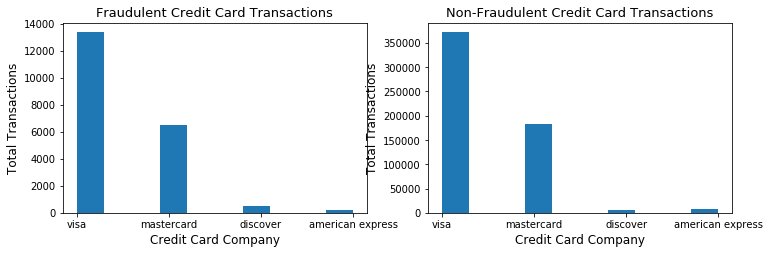

In [28]:
# What is the distribution of fraudulent credit card transactions for each credit card company?
fig, ax = plt.subplots(1, 2, figsize=(12, 3.5))
ax[0].hist(df_eda_fraud.card4.sort_values(ascending=False))
ax[0].set_title("Fraudulent Credit Card Transactions", fontsize=13)
ax[0].set_ylabel("Total Transactions", fontsize=12)
ax[0].set_xlabel("Credit Card Company", fontsize=12)

ax[1].hist(df_eda_not_fraud.card4.sort_values(ascending=False))
ax[1].set_title("Non-Fraudulent Credit Card Transactions", fontsize=13)
ax[1].set_ylabel("Total Transactions", fontsize=12)
ax[1].set_xlabel("Credit Card Company", fontsize=12)
plt.show()

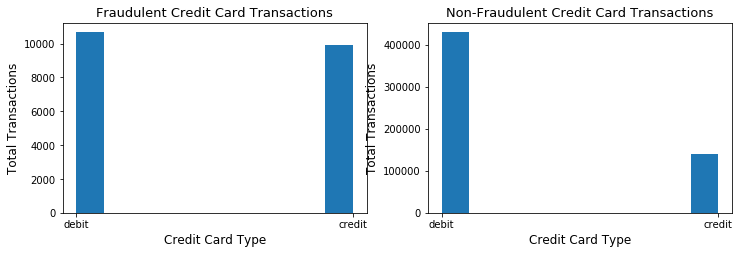

In [29]:
# Among all fraudulent transactions, do we see more debit or credit card transactions that are fraudulent?
df_card6_not_fraud = df_eda_not_fraud[(df_eda_not_fraud.card6=='credit') 
                                    | (df_eda_not_fraud.card6=='debit')]
df_card6_not_fraud = df_card6_not_fraud.card6.sort_values(ascending=False)
df_card6_fraud = df_eda_fraud.card6.sort_values(ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(12,3.5))
ax[0].hist(df_card6_fraud)
ax[0].set_title("Fraudulent Credit Card Transactions", fontsize=13)
ax[0].set_ylabel("Total Transactions", fontsize=12)
ax[0].set_xlabel("Credit Card Type", fontsize=12)

ax[1].hist(df_card6_not_fraud)
ax[1].set_title("Non-Fraudulent Credit Card Transactions", fontsize=13)
ax[1].set_ylabel("Total Transactions", fontsize=12)
ax[1].set_xlabel("Credit Card Type", fontsize=12)
plt.show()

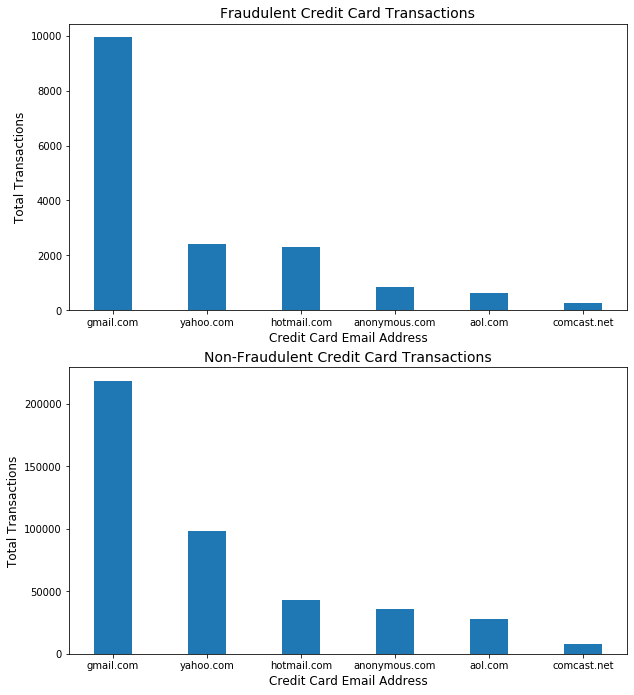

In [156]:
# top 10 most common email domains for credit card transactions
index_p_emaildomain= []
list_top_p_emaildomain = df_eda.P_emaildomain.value_counts().head(6).index
for val in list_top_p_emaildomain:
    index_temp = df_eda[df_eda.P_emaildomain==val].index.values
    index_p_emaildomain.append(index_temp)
index_final = [val for sublist in index_p_emaildomain for val in sublist]
df_p_emaildomain = df_eda.loc[index_final,:]

# creating dataframes for histogram
y_counts = df_p_emaildomain[df_p_emaildomain.isFraud==0].P_emaildomain.value_counts()
x_label = y_counts.index
y_counts_2 = df_p_emaildomain[df_p_emaildomain.isFraud==1].P_emaildomain.value_counts()
x_label_2 = y_counts.index

# creating plots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
plt.subplots_adjust(top=1)

ax[0].set_title("Fraudulent Credit Card Transactions", fontsize=14)
ax[0].set_ylabel('Total Transactions', fontsize=12)
ax[0].set_xlabel('Credit Card Email Address', fontsize=12)
ax[0].bar(x_label_2, y_counts_2, width=.4)

ax[1].set_title("Non-Fraudulent Credit Card Transactions", fontsize=14)
ax[1].set_ylabel('Total Transactions', fontsize=12)
ax[1].set_xlabel('Credit Card Email Address', fontsize=12)
ax[1].bar(x_label, y_counts, width=.4)
plt.show()

In [ ]:
############################
# df_email eda

In [457]:
# filling na
mode_p_emaildomain = df_eda['P_emaildomain'].mode()[0]
df_eda['P_emaildomain'] = df_eda['P_emaildomain'].fillna(mode_p_emaildomain)

# not fraud dataframe
df_email_notfraud = df_eda[df_eda.isFraud==0].P_emaildomain
df_email_notfraud = df_email_notfraud.value_counts()
df_email_notfraud = df_email_notfraud.reset_index()
df_email_notfraud = df_email_notfraud.rename(columns={'P_emaildomain':'email_notfraud_count',
                                                      'index':'index_email'})

# fraud dataframe
df_email_fraud = df_eda[df_eda.isFraud==1].P_emaildomain
df_email_fraud = df_email_fraud.value_counts()
df_email_fraud = df_email_fraud.reset_index()
df_email_fraud = df_email_fraud.rename(columns={'P_emaildomain':'email_fraud_count',
                                                'index':'index_email'})

df_email_eda = df_email_notfraud.merge(df_email_fraud, how='left', on='index_email')
df_email_eda = df_email_eda.fillna(0)

df_email_eda['email_percent_fraud'] = (df_email_eda['email_fraud_count']
                                   / (df_email_eda['email_fraud_count'] + df_email_eda['email_notfraud_count']))
# df_email_eda['email_fraud_ratio'] = (df_email_eda['email_fraud_count']
#                                    / df_email_eda['email_notfraud_count'])

df_email_eda['email_total'] = (df_email_eda['email_fraud_count']
                             + df_email_eda['email_notfraud_count'])
df_email_eda.head()

,index_email,email_notfraud_count,email_fraud_count,email_percent_fraud,email_total
0,gmail.com,310078,12733.0,0.039444,322811.0
1,yahoo.com,98637,2297.0,0.022757,100934.0
2,hotmail.com,42854,2396.0,0.052950,45250.0
3,anonymous.com,36139,859.0,0.023217,36998.0
4,aol.com,27672,617.0,0.021811,28289.0


In [458]:
# eda email dataframes
df_em_total = df_email_eda.sort_values('email_total', ascending=False)
df_em_total = df_em_total.head(20)
df_em_total = df_em_total.sort_values('email_total', ascending=True)

df_em_perc_fraud = df_email_eda.sort_values('email_percent_fraud', ascending=False)
df_em_perc_fraud = df_em_perc_fraud.head(20)
df_em_perc_fraud = df_em_perc_fraud.sort_values('email_percent_fraud', ascending=True)
# df_em_ratio.head()
# df_em_perc_fraud

In [459]:
# NEXT, we have double checked our work, now we need to figure out how to calculate all email 
# addresses versus other email addresses from smaller providers, then combine fraud versus not fraud
# and compare all of them to see if there are more proportional occurrences of fraud by ratio. 

df_email_total = df_eda.P_emaildomain.value_counts().reset_index()
df_email_total = df_email_total.rename(columns={'P_emaildomain':'email_count',
                                                'index':'index_email'})

df_uncommon_emails = df_email_total[(df_email_total.index_email != 'gmail.com')
                                     & (df_email_total.index_email != 'yahoo.com')
                                     & (df_email_total.index_email != 'hotmail.com')
                                     & (df_email_total.index_email != 'anonymous.com')
                                     & (df_email_total.index_email != 'aol.com')
                                  ]
df_uncommon_emails.head()

,index_email,email_count
5,comcast.net,7888
6,icloud.com,6267
7,outlook.com,5096
8,msn.com,4092
9,att.net,4033


In [460]:
df_email_eda = df_email_eda.sort_values('email_total', ascending=False)

df_uncommon_email = df_email_eda[(df_email_eda.index_email != 'gmail.com')
                                     & (df_email_eda.index_email != 'yahoo.com')
                                     & (df_email_eda.index_email != 'hotmail.com')
                                     & (df_email_eda.index_email != 'anonymous.com')
                                     & (df_email_eda.index_email != 'aol.com')
                                  ]

df_common_email = df_email_eda.head(5)
df_common_email
# we need to figure out how to 

,index_email,email_notfraud_count,email_fraud_count,email_percent_fraud,email_total
0,gmail.com,310078,12733.0,0.039444,322811.0
1,yahoo.com,98637,2297.0,0.022757,100934.0
2,hotmail.com,42854,2396.0,0.052950,45250.0
3,anonymous.com,36139,859.0,0.023217,36998.0
4,aol.com,27672,617.0,0.021811,28289.0


In [465]:
val_total_notfraud = np.sum(df_uncommon_email.email_notfraud_count)
# print('total fraud ', val_total_notfraud)
val_total_fraud = np.sum(df_uncommon_email.email_fraud_count)
# print('total not fraud ', val_total_fraud)
val_total_email = np.sum(df_uncommon_email.email_total)
# print('total email ', val_total_email)
val_percent_fraud = val_total_fraud/val_total_email
# print(val_fraud_perc)

# build out the row 
series_index = pd.Series('small providers', name='index_email')
series_notfraud = pd.Series(val_total_notfraud, name='email_notfraud_count')

series_fraud = pd.Series(val_total_fraud, name='email_fraud_count')
series_perc = pd.Series(val_percent_fraud, name='email_percent_fraud')
series_total = pd.Series(val_total_email, name='email_total')

df_small_em_providers = pd.concat([series_index, series_notfraud, series_fraud, 
                                   series_perc, series_total],axis=1)

df_top5_all = pd.concat([df_common_email, df_small_em_providers], axis=0)
df_top5_all


,index_email,email_notfraud_count,email_fraud_count,email_percent_fraud,email_total
0,gmail.com,310078,12733.0,0.039444,322811.0
1,yahoo.com,98637,2297.0,0.022757,100934.0
2,hotmail.com,42854,2396.0,0.052950,45250.0
3,anonymous.com,36139,859.0,0.023217,36998.0
4,aol.com,27672,617.0,0.021811,28289.0
0,small providers,54497,1761.0,0.031302,56258.0


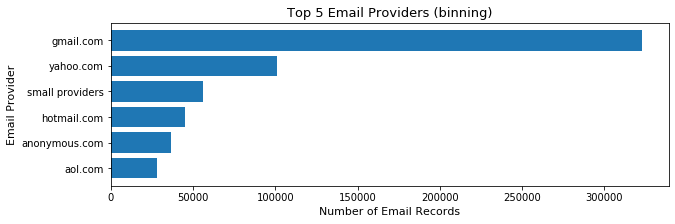

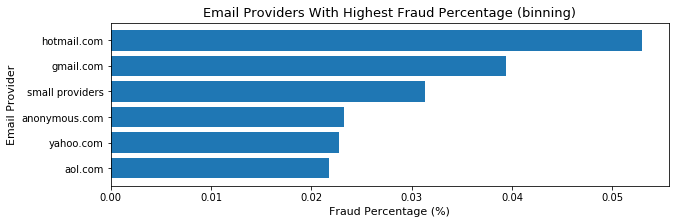

In [495]:
# NEXT, fix graph issue below. We then need to organize and write about our findings and 
# how we can use this as actionable insights to potentially create better features out of this.
df_top5_count = df_top5_all.sort_values('email_total', ascending=True)
df_top5_perc = df_top5_all.sort_values('email_percent_fraud', ascending=True)

# top 5 email count
plt.subplots(figsize=(10, 3))
plt.title('Top 5 Email Providers (binning)', fontsize=13)
plt.ylabel('Email Provider', fontsize=11)
plt.xlabel('Number of Email Records', fontsize=11)
plt.barh(df_top5_count.index_email, df_top5_count.email_total)
plt.show()

# top 5 highest fraud percent
plt.subplots(figsize=(10, 3))
plt.title('Email Providers With Highest Fraud Percentage (binning)', fontsize=13)
plt.ylabel('Email Provider', fontsize=11)
plt.xlabel('Fraud Percentage (%)', fontsize=11)
plt.barh(df_top5_perc.index_email, df_top5_perc.email_percent_fraud)
plt.show()

# what do we do next? We are seeing that small providers put together 
# what are our findings? We find that even after grouping together, hotmail.com is the
# top offender and "small providers" grouped together rank lower than gmail.com

# We decide to bin things because the difference between our major email providers and minor warrant this. 


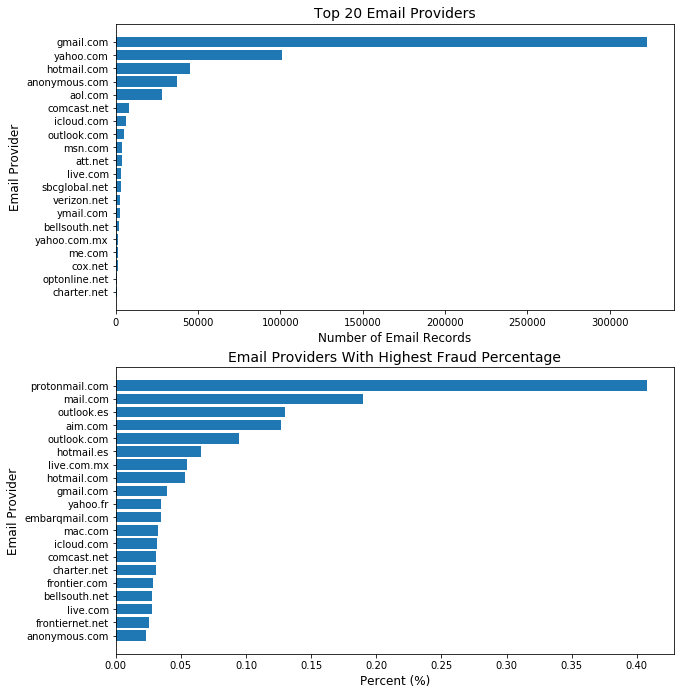

In [404]:
# plotting new email df's
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
plt.subplots_adjust(top=1)

# email all
# "what we find is that the most common email occurence shows this..."
ax[0].set_title('Top 20 Email Providers', fontsize=14)
ax[0].set_ylabel('Email Provider', fontsize=12)
ax[0].set_xlabel('Number of Email Records', fontsize=12)
ax[0].barh(df_em_total.index_email, df_em_total.email_total)
plt.show
# email fraud ratio
# "but the email ratio is this..." 
ax[1].set_title('Email Providers With Highest Fraud Percentage', fontsize=14)
ax[1].set_ylabel('Email Provider', fontsize=12)
ax[1].set_xlabel('Percent (%)', fontsize=12)
ax[1].barh(df_em_perc_fraud.index_email, df_em_perc_fraud.email_percent_fraud)
plt.show()

# Our model performance showed frontiernet.net was the strongest predictor for all email addresses

In [174]:
# NEXT, create bar chart horizontal with all email for fraud population
# df_email_all.index_email
# df_email_all.P_emaildomain_all

# what we find is that the most common email occurence shows this...
# <insert image>
# but the email ratio is this...
# <insert image>
# Our best performing algorithm showed that frontiernet.net is our most highly corr
# <insert image>

# What does this tell us? Is it a problem
# with the email subscription or the person who holds the card? 

# the majority of fraud victims have what email service?

In [219]:
# NEXT show smaller sets of email 
# top 10 most common email domains for credit card transactions
index_p_emaildomain= []
list_top_p_emaildomain = df_eda.P_emaildomain.value_counts().tail(6).index
for val in list_top_p_emaildomain:
    index_temp = df_eda[df_eda.P_emaildomain==val].index.values
    index_p_emaildomain.append(index_temp)
index_final = [val for sublist in index_p_emaildomain for val in sublist]
df_p_emaildomain = df_eda.loc[index_final,:]

# creating dataframes for histogram
y_counts = df_p_emaildomain[df_p_emaildomain.isFraud==0].P_emaildomain.value_counts()
x_label = y_counts.index
y_counts_2 = df_p_emaildomain[df_p_emaildomain.isFraud==1].P_emaildomain.value_counts()
x_label_2 = y_counts.index

# creating plots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
plt.subplots_adjust(top=1)

ax[0].set_title("Fraudulent Credit Card Transactions", fontsize=14)
ax[0].set_ylabel('Total Transactions', fontsize=12)
ax[0].set_xlabel('Credit Card Email Address', fontsize=12)
ax[0].bar(x_label_2, y_counts_2, width=.4)

ax[1].set_title("Non-Fraudulent Credit Card Transactions", fontsize=14)
ax[1].set_ylabel('Total Transactions', fontsize=12)
ax[1].set_xlabel('Credit Card Email Address', fontsize=12)
ax[1].bar(x_label, y_counts, width=.4)
plt.show()

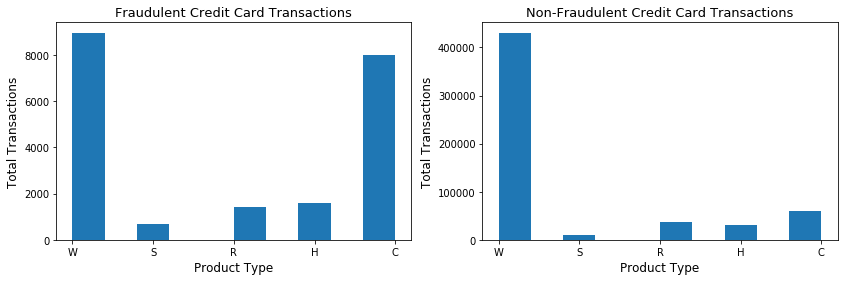

In [31]:
# EDA Product_CD
# COMPLETED
df_product_cd_notfraud = df_raw[df_raw.isFraud==0].ProductCD.sort_values(ascending=False)
df_product_cd_fraud = df_raw[df_raw.isFraud==1].ProductCD.sort_values(ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].set_title("Fraudulent Credit Card Transactions", fontsize=13)
ax[0].set_ylabel('Total Transactions', fontsize=12)
ax[0].set_xlabel('Product Type', fontsize=12)
ax[0].hist(df_product_cd_fraud)

ax[1].set_title("Non-Fraudulent Credit Card Transactions", fontsize=13)
ax[1].set_ylabel('Total Transactions', fontsize=12)
ax[1].set_xlabel('Product Type', fontsize=12)
ax[1].hist(df_product_cd_notfraud)
plt.show()

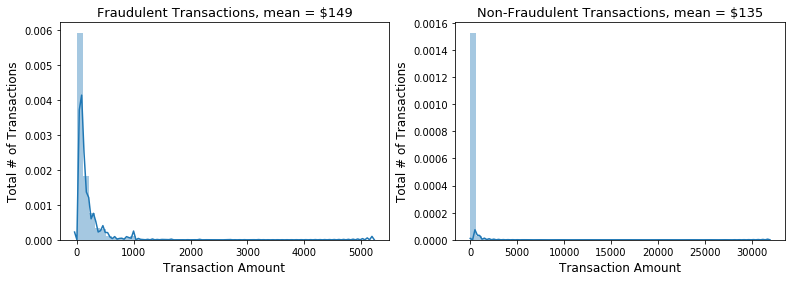

In [34]:
# EDA TransactionAmt
df_transactionamt_not_fraud = df_eda[df_eda.isFraud==0].TransactionAmt
df_transactionamt_fraud = df_eda[df_eda.isFraud==1].TransactionAmt

# creating plots
fig, ax = plt.subplots(1, 2, figsize=(13,4))

sns.distplot(df_transactionamt_fraud, ax=ax[0])
ax[0].set_title('Fraudulent Transactions, mean = $149', fontsize=13)
ax[0].set_ylabel('Total # of Transactions', fontsize=12)
ax[0].set_xlabel('Transaction Amount', fontsize=12)

sns.distplot(df_transactionamt_not_fraud, ax=ax[1])
ax[1].set_title('Non-Fraudulent Transactions, mean = $135', fontsize=13)
ax[1].set_ylabel('Total # of Transactions', fontsize=12)
ax[1].set_xlabel('Transaction Amount', fontsize=12)
plt.show()

In [25]:
df_features = pd.read_csv('/Users/krahman/work/fraud_detection/saved_files/df_imputed.csv')
df_features = df_features.drop('Unnamed: 0', axis=1)

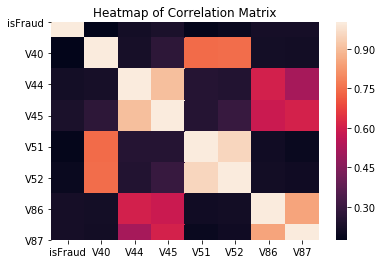

In [26]:
fraud_summary = df_features.groupby('isFraud')
fraud_summary.mean().to_csv('/Users/krahman/work/fraud_detection/saved_files/fraud_summary.csv')

corr = df_features.corr()
corr.to_csv('/Users/krahman/work/fraud_detection/saved_files/corr_matrix.csv')
corr2 = corr[corr['isFraud']>.17]
corr2 = corr2.loc[:,corr2.index]

sns.heatmap(corr2,
           xticklabels=corr2.columns.values,
           yticklabels=corr2.columns.values)
plt.title('Heatmap of Correlation Matrix')
plt.show()

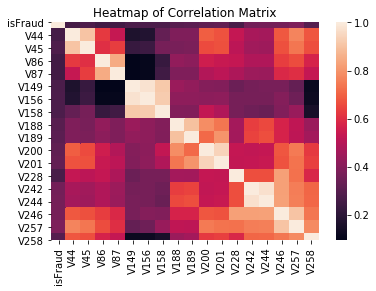

In [35]:
fraud_summary = df_eda.groupby('isFraud')
# fraud_summary.mean().to_csv('/Users/krahman/work/fraud_detection/saved_files/fraud_summary.csv')

corr = df_eda.corr()
# corr.to_csv('/Users/krahman/work/fraud_detection/saved_files/corr_matrix.csv')
corr2 = corr[corr['isFraud']>.25]
corr2 = corr2.loc[:,corr2.index]

sns.heatmap(corr2,
           xticklabels=corr2.columns.values,
           yticklabels=corr2.columns.values)
plt.title('Heatmap of Correlation Matrix')
plt.show()